In [1]:
# Liste des librairies importées
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.mlab as mlab
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import decomposition, preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('df_final.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
df = df.set_index('pays')
df.drop('code_pays', axis = 1, inplace=True)

## Clustering via la méthode du K-Means

### Détermination du nombre de clusters

D:\Users\cecile\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\cecile\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 : 69.22158617429878
2 : 53.96071059869567
3 : 48.16189297150877
4 : 45.596384141407064
5 : 43.32223085599522
6 : 41.9958453373322
7 : 40.853820923378734
8 : 39.78176520287122
9 : 39.134156442464885


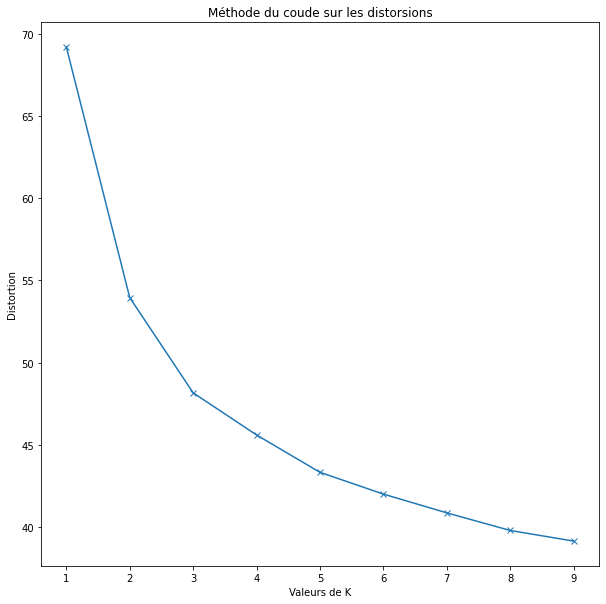

In [4]:
# Sélection des pays par l'intermédiaire d'un algorithme KMeans
# Détermination du nombre de clusters par l'intermédiaire de la méthode du coude
from scipy.spatial.distance import cdist

X = df.values

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


for key,val in mapping1.items(): 
    print(str(key)+' : '+ str(val)) 

plt.figure(figsize=(10,10))
plt.plot(K, distortions, 'x-') 
plt.xlabel('Valeurs de K') 
plt.ylabel('Distortion') 
plt.title('Méthode du coude sur les distorsions')
plt.show()

### Modélisation par la méthode du K-Means

#### Avec K = 2

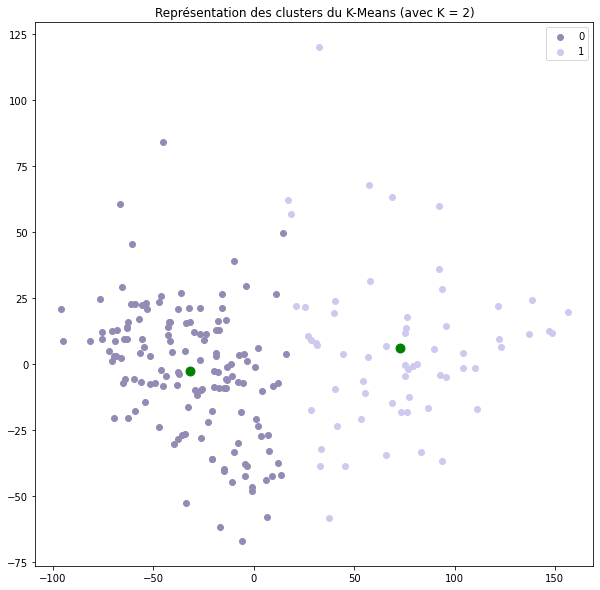

In [5]:
pca = PCA(2)

#Transforme les données avant projection
data = pca.fit_transform(df)
 
#Initiatilisaion de la class KMeans
kmeans = KMeans(n_clusters= 2)
 
#Prédiction
label = kmeans.fit_predict(data)
 
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
# Create an array with the colors you want to use
colors = ["#948ab4", "#cdc9ef"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Représentation graphique:
plt.figure(figsize=(10,10))

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 1, color = 'g')
plt.title('Représentation des clusters du K-Means (avec K = 2)')
plt.savefig('K-Means_K2.png')
plt.legend()
plt.show()

In [6]:
km_clusters2 = pd.DataFrame({'pays' : df.index,
                            'cluster_km_2' : kmeans.labels_})
km_clusters2.head()

,pays,cluster_km_2
0,Afghanistan,1
1,Afrique du Sud,0
2,Albanie,0
3,Algérie,0
4,Allemagne,0


#### Avec K = 4

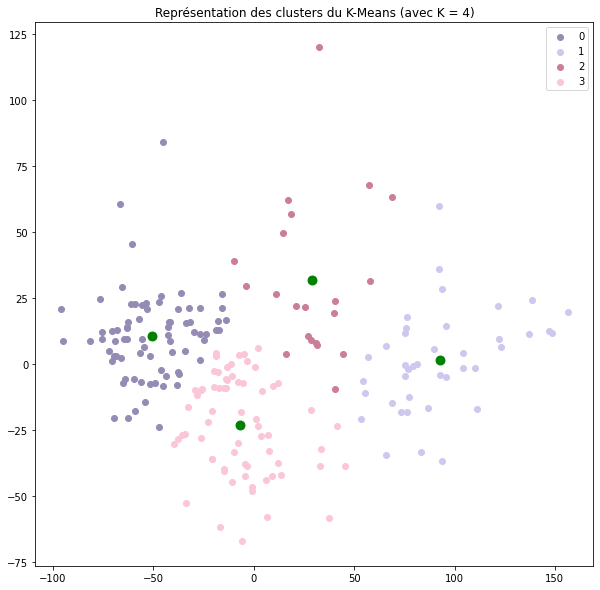

In [7]:
pca = PCA(2)

#Transforme les données avant projection
data = pca.fit_transform(df)
 
#Initiatilisaion de la class KMeans
kmeans = KMeans(n_clusters= 4)
 
#Prédiction
label = kmeans.fit_predict(data)
 
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)


# Create an array with the colors you want to use
colors = ["#958bb5", "#ccc8ee","#cb7d9a", "#fbc7d6"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))


#Représentation graphique:

plt.figure(figsize=(10,10))

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 1, color = 'g')
plt.legend()
plt.title('Représentation des clusters du K-Means (avec K = 4)')
plt.savefig('K-Means_K4.png')
plt.show()

In [8]:
data = pd.DataFrame(data)
data.head()
data.to_csv('data.csv')
data.to_excel('data.xlsx')

In [9]:
km_clusters = pd.DataFrame({'pays' : df.index,
                            'cluster_km' : kmeans.labels_})
km_clusters.head()

,pays,cluster_km
0,Afghanistan,1
1,Afrique du Sud,3
2,Albanie,3
3,Algérie,3
4,Allemagne,0


#### Avec K = 5

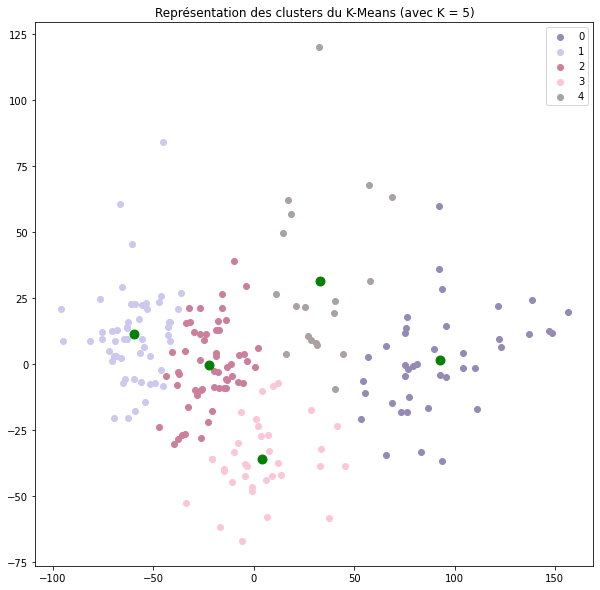

In [10]:
pca = PCA(2)

#Transform the data
data = pca.fit_transform(df)
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data)
 
#Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

plt.figure(figsize=(10,10))

# Create an array with the colors you want to use
colors = ["#948ab4", "#ccc8ee","#cc7e9b", "#fbc7d6", "#aaa2a1"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#plotting the results:
for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha=1, color = 'g')
plt.legend()
plt.title('Représentation des clusters du K-Means (avec K = 5)')
plt.savefig('K-Means_K5.png')
plt.show()

In [11]:
km_clusters5 = pd.DataFrame({'pays' : df.index,
                            'cluster_km_5' : kmeans.labels_})
km_clusters5.head()

,pays,cluster_km_5
0,Afghanistan,0
1,Afrique du Sud,3
2,Albanie,2
3,Algérie,3
4,Allemagne,1


## Classification ascendante hiérarchique : le dendrogramme

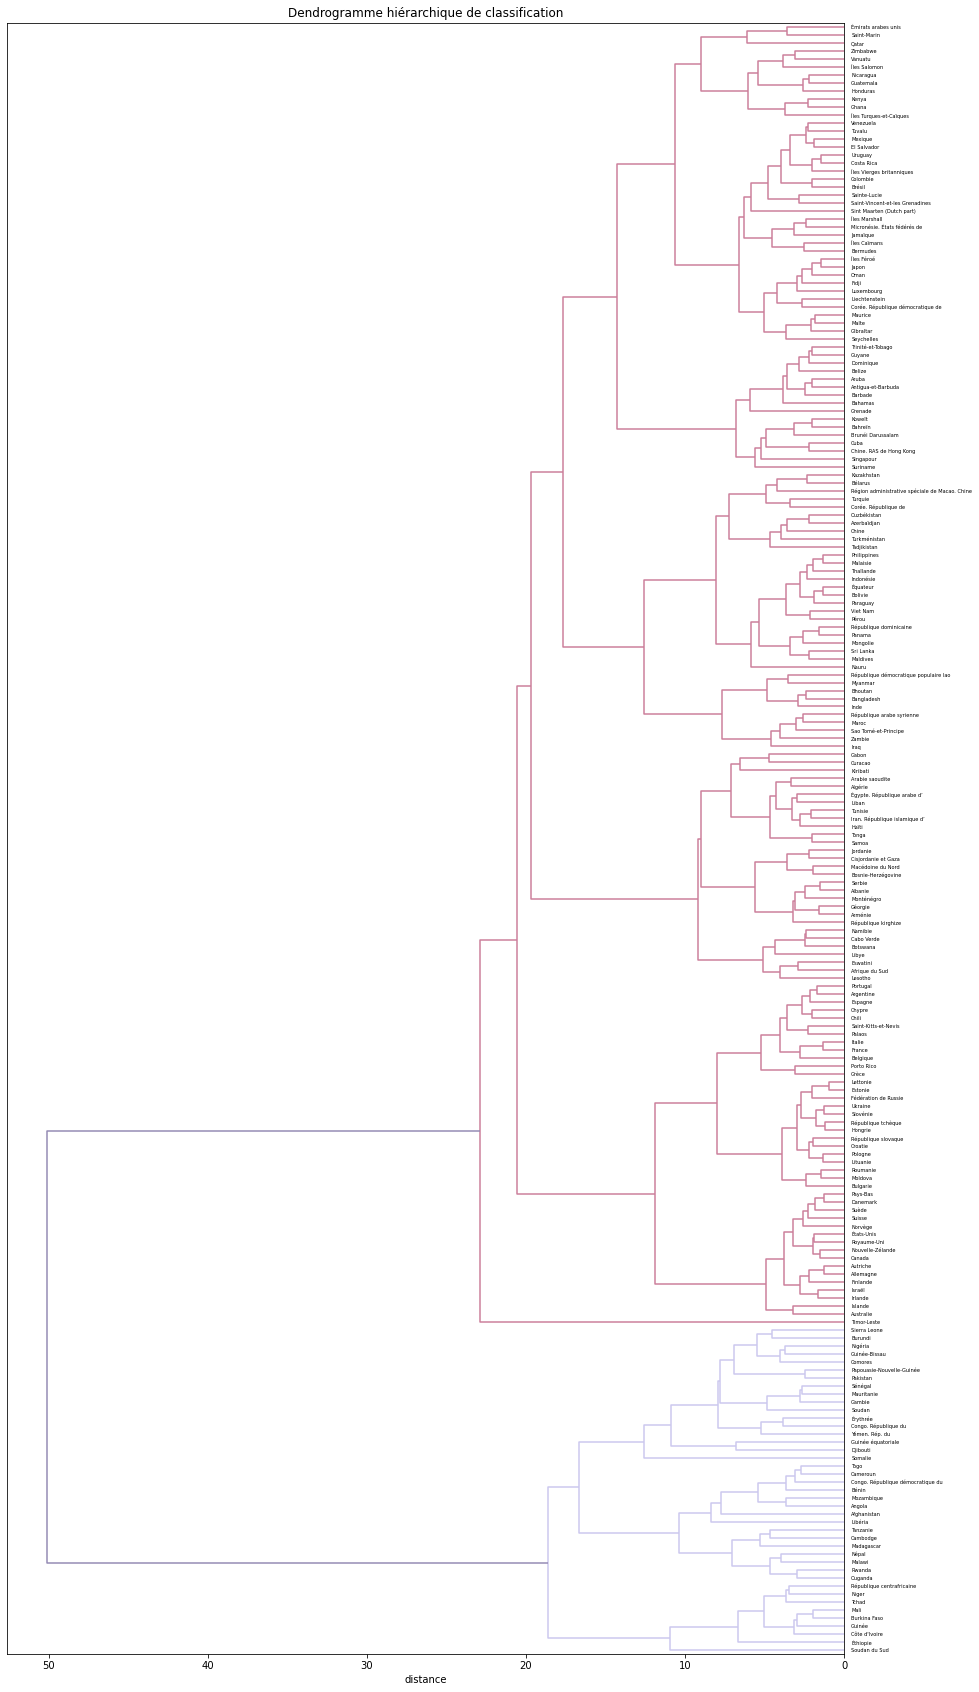

In [12]:
# préparation des données pour le clustering
X = df.values
names = df.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plt.figure(figsize=(15,30))
dendrogram(Z,
        labels = names,
        orientation = "left")
plt.title('Dendrogramme hiérarchique de classification')
plt.xlabel('distance')
plt.savefig('ddg.png')
plt.show()

In [13]:
ddg_labels = fcluster(Z, t=3, criterion='maxclust')
ddg_clusters = pd.DataFrame({'pays' : df.index,
                             'cluster_ddg' : ddg_labels})
ddg_clusters.head()

,pays,cluster_ddg
0,Afghanistan,1
1,Afrique du Sud,2
2,Albanie,2
3,Algérie,2
4,Allemagne,2


## Modélisation avec l'algorithme DBSCAN

### Détermination d'epsilon

In [14]:
X = df.values

In [15]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

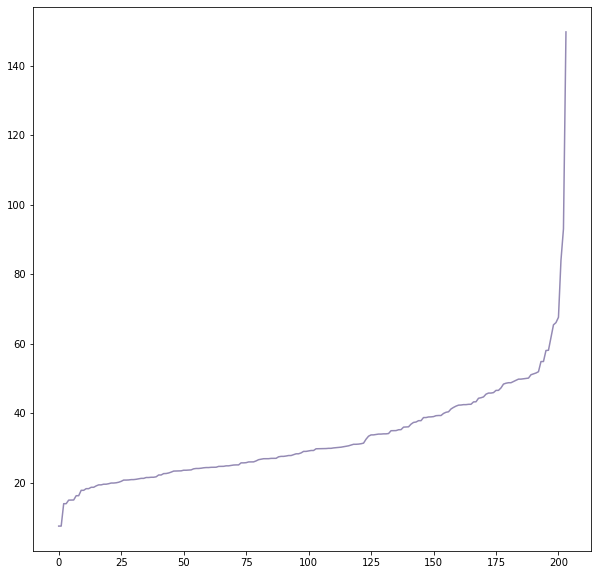

In [16]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)

### Réalisation du DBSCAN

In [17]:
# Compute DBSCAN
db = DBSCAN(eps=45, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 33


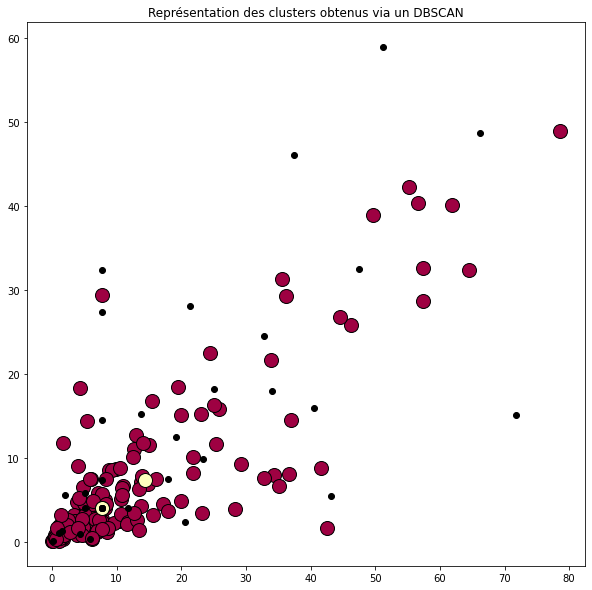

In [18]:
# Black removed and is used for noise instead

plt.figure(figsize=(10,10))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Représentation des clusters obtenus via un DBSCAN')
plt.savefig('DBSCAN.png')
plt.show()

In [19]:
db_clusters = pd.DataFrame({'pays' : df.index,
                            'cluster_db' : db.labels_})
db_clusters.head()

,pays,cluster_db
0,Afghanistan,-1
1,Afrique du Sud,0
2,Albanie,0
3,Algérie,0
4,Allemagne,0


In [20]:
clustering = pd.merge(km_clusters, km_clusters2, on = 'pays')
clustering = pd.merge(clustering, km_clusters5, on = 'pays')
clustering = pd.merge(clustering, ddg_clusters, on = 'pays')
clustering = pd.merge(clustering, db_clusters, on = 'pays')
clustering.head()

,pays,cluster_km,cluster_km_2,cluster_km_5,cluster_ddg,cluster_db
0,Afghanistan,1,1,0,1,-1
1,Afrique du Sud,3,0,3,2,0
2,Albanie,3,0,2,2,0
3,Algérie,3,0,3,2,0
4,Allemagne,0,0,1,2,0


In [21]:
del km_clusters2
del km_clusters
del km_clusters5
del ddg_clusters
del db_clusters

In [22]:
data_with_clusters = pd.merge(df, clustering, on = 'pays')
data_with_clusters.head()

,pays,ados_non-scol,enfants_non-scol,inscriptions_ens_sup,inscriptions_primaire,inscriptions_préscol,inscriptions_secondaire,ratio_ens_sup,ratio_primaire,ratio_secondaire,...,indice_gini,pop_active_avec_diplome,tx_emploi_15+,tx_actifs_15-24,epargne_brute(PIB),cluster_km,cluster_km_2,cluster_km_5,cluster_ddg,cluster_db
0,Afghanistan,7.781353,3.996940,4.619342,94.895554,3.080470,39.700971,0.294833,0.599088,0.442298,...,65.500000,49.745001,49.372499,45.339999,20.896559,1,1,0,1,-1
1,Afrique du Sud,13.785806,7.176252,20.994972,104.268580,22.914647,94.457259,1.296527,0.963646,1.068906,...,63.550000,43.265556,38.091579,27.254737,16.371788,3,0,3,2,0
2,Albanie,4.755447,6.472873,41.650427,100.335247,66.300319,86.715374,1.308677,1.016700,0.982993,...,31.962500,45.808462,47.963571,34.666428,21.311708,3,0,2,2,0
3,Algérie,7.781353,2.718592,29.798487,111.345440,35.694609,80.699898,1.299649,0.938633,1.063733,...,27.600000,52.174000,34.886250,25.401429,47.290134,3,0,3,2,0
4,Allemagne,2.639915,2.280481,67.467917,102.896194,108.693307,101.335926,0.985777,0.995832,0.959991,...,30.878571,38.054737,55.450000,50.402631,26.247102,0,0,1,2,0


In [23]:
data_with_clusters.to_csv('data_with_clusters.csv')
data_with_clusters.to_excel('data_with_clusters.xlsx')